In [1]:
import numpy as np
from numpy import linalg
from matplotlib import pyplot as plt
from math import sqrt

In [2]:
def LDU(A):
    D=np.diag(np.diagonal(A))
    L=-1*(np.tril(A)-D)
    U=-1*(np.triu(A)-D)
    return D,L,U

In [3]:
def Jacobi(A,b,x_0,tol=1e-6,n_max=10000):
    D,L,U=LDU(A)
    n=0
    D_inv=linalg.inv(D)
    G_j=np.matmul(D_inv,L+U)
    c_j=D_inv.dot(b)
    while linalg.norm(A.dot(x_0)-b,np.inf)>=tol and n<n_max:
        
        x_0=G_j.dot(x_0)+c_j
        n+=1
    return x_0,linalg.norm(A.dot(x_0)-b,np.inf),n

In [4]:
def GS(A,b,x_0,tol=1e-6,n_max=10000):
    D,L,U=LDU(A)
    n=0
    D_L_inv=linalg.inv(D-L)
    G_g=np.matmul(D_L_inv,U)
    c_g=D_L_inv.dot(b)
    while linalg.norm(A.dot(x_0)-b,np.inf)>=tol and n<n_max:
        x_0=G_g.dot(x_0)+c_g
        n+=1
    return x_0,linalg.norm(A.dot(x_0)-b,np.inf),n

In [5]:
def BVP(f,a,b,c,alpha,beta,numpts):
    xvec=np.linspace(a,b,numpts+1)
    h=xvec[1]-xvec[0]
    bvec=f(xvec[1:-1])
    bvec[0]=bvec[0]-alpha/h**2
    bvec[-1]=bvec[-1]-beta/h**2
    A=-1*(2/h**2+c)*np.identity(numpts-1)+np.diag((1/h**2)*np.ones(numpts-2),k=1)+np.diag((1/h**2)*np.ones(numpts-2),k=-1)
    return A,bvec

In [6]:
f= lambda x:x*0

In [14]:
A,b=BVP(f,0,1,10,0,1,50)

In [15]:
u_j,res_j,n_j=Jacobi(A,b,np.zeros(np.shape(A)[0]))

In [16]:
u_g,res_g,n_g=GS(A,b,np.zeros(np.shape(A)[0]))

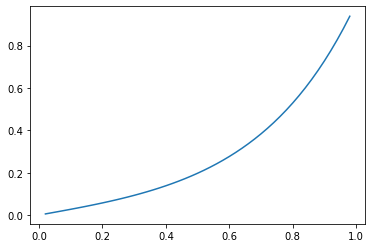

In [17]:
plt.plot(np.linspace(0,1,len(u_j)+2)[1:-1],u_j)

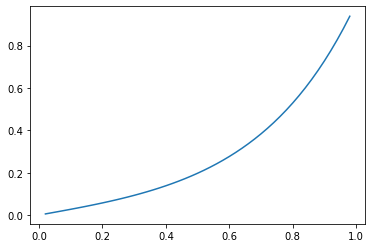

In [18]:
plt.plot(np.linspace(0,1,len(u_g)+2)[1:-1],u_g)

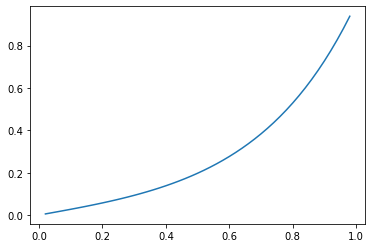

In [19]:
plt.plot(np.linspace(0,1,np.shape(A)[0]+2)[1:-1],linalg.inv(A).dot(b))

In [20]:
n_j

4115

In [21]:
n_g

1983